# Assignment- Linear Regression

### Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

    Which variables are significant in predicting the price of a car
    How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

### Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

In [93]:
# Importing required package
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [94]:
car_df = pd.read_csv('CarPrice_Assignment.csv')

In [95]:
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [96]:
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [97]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [98]:
# Checking for null values.
((car_df.isnull() | car_df.isna()).sum() * 100 / car_df.index.size).round(2)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

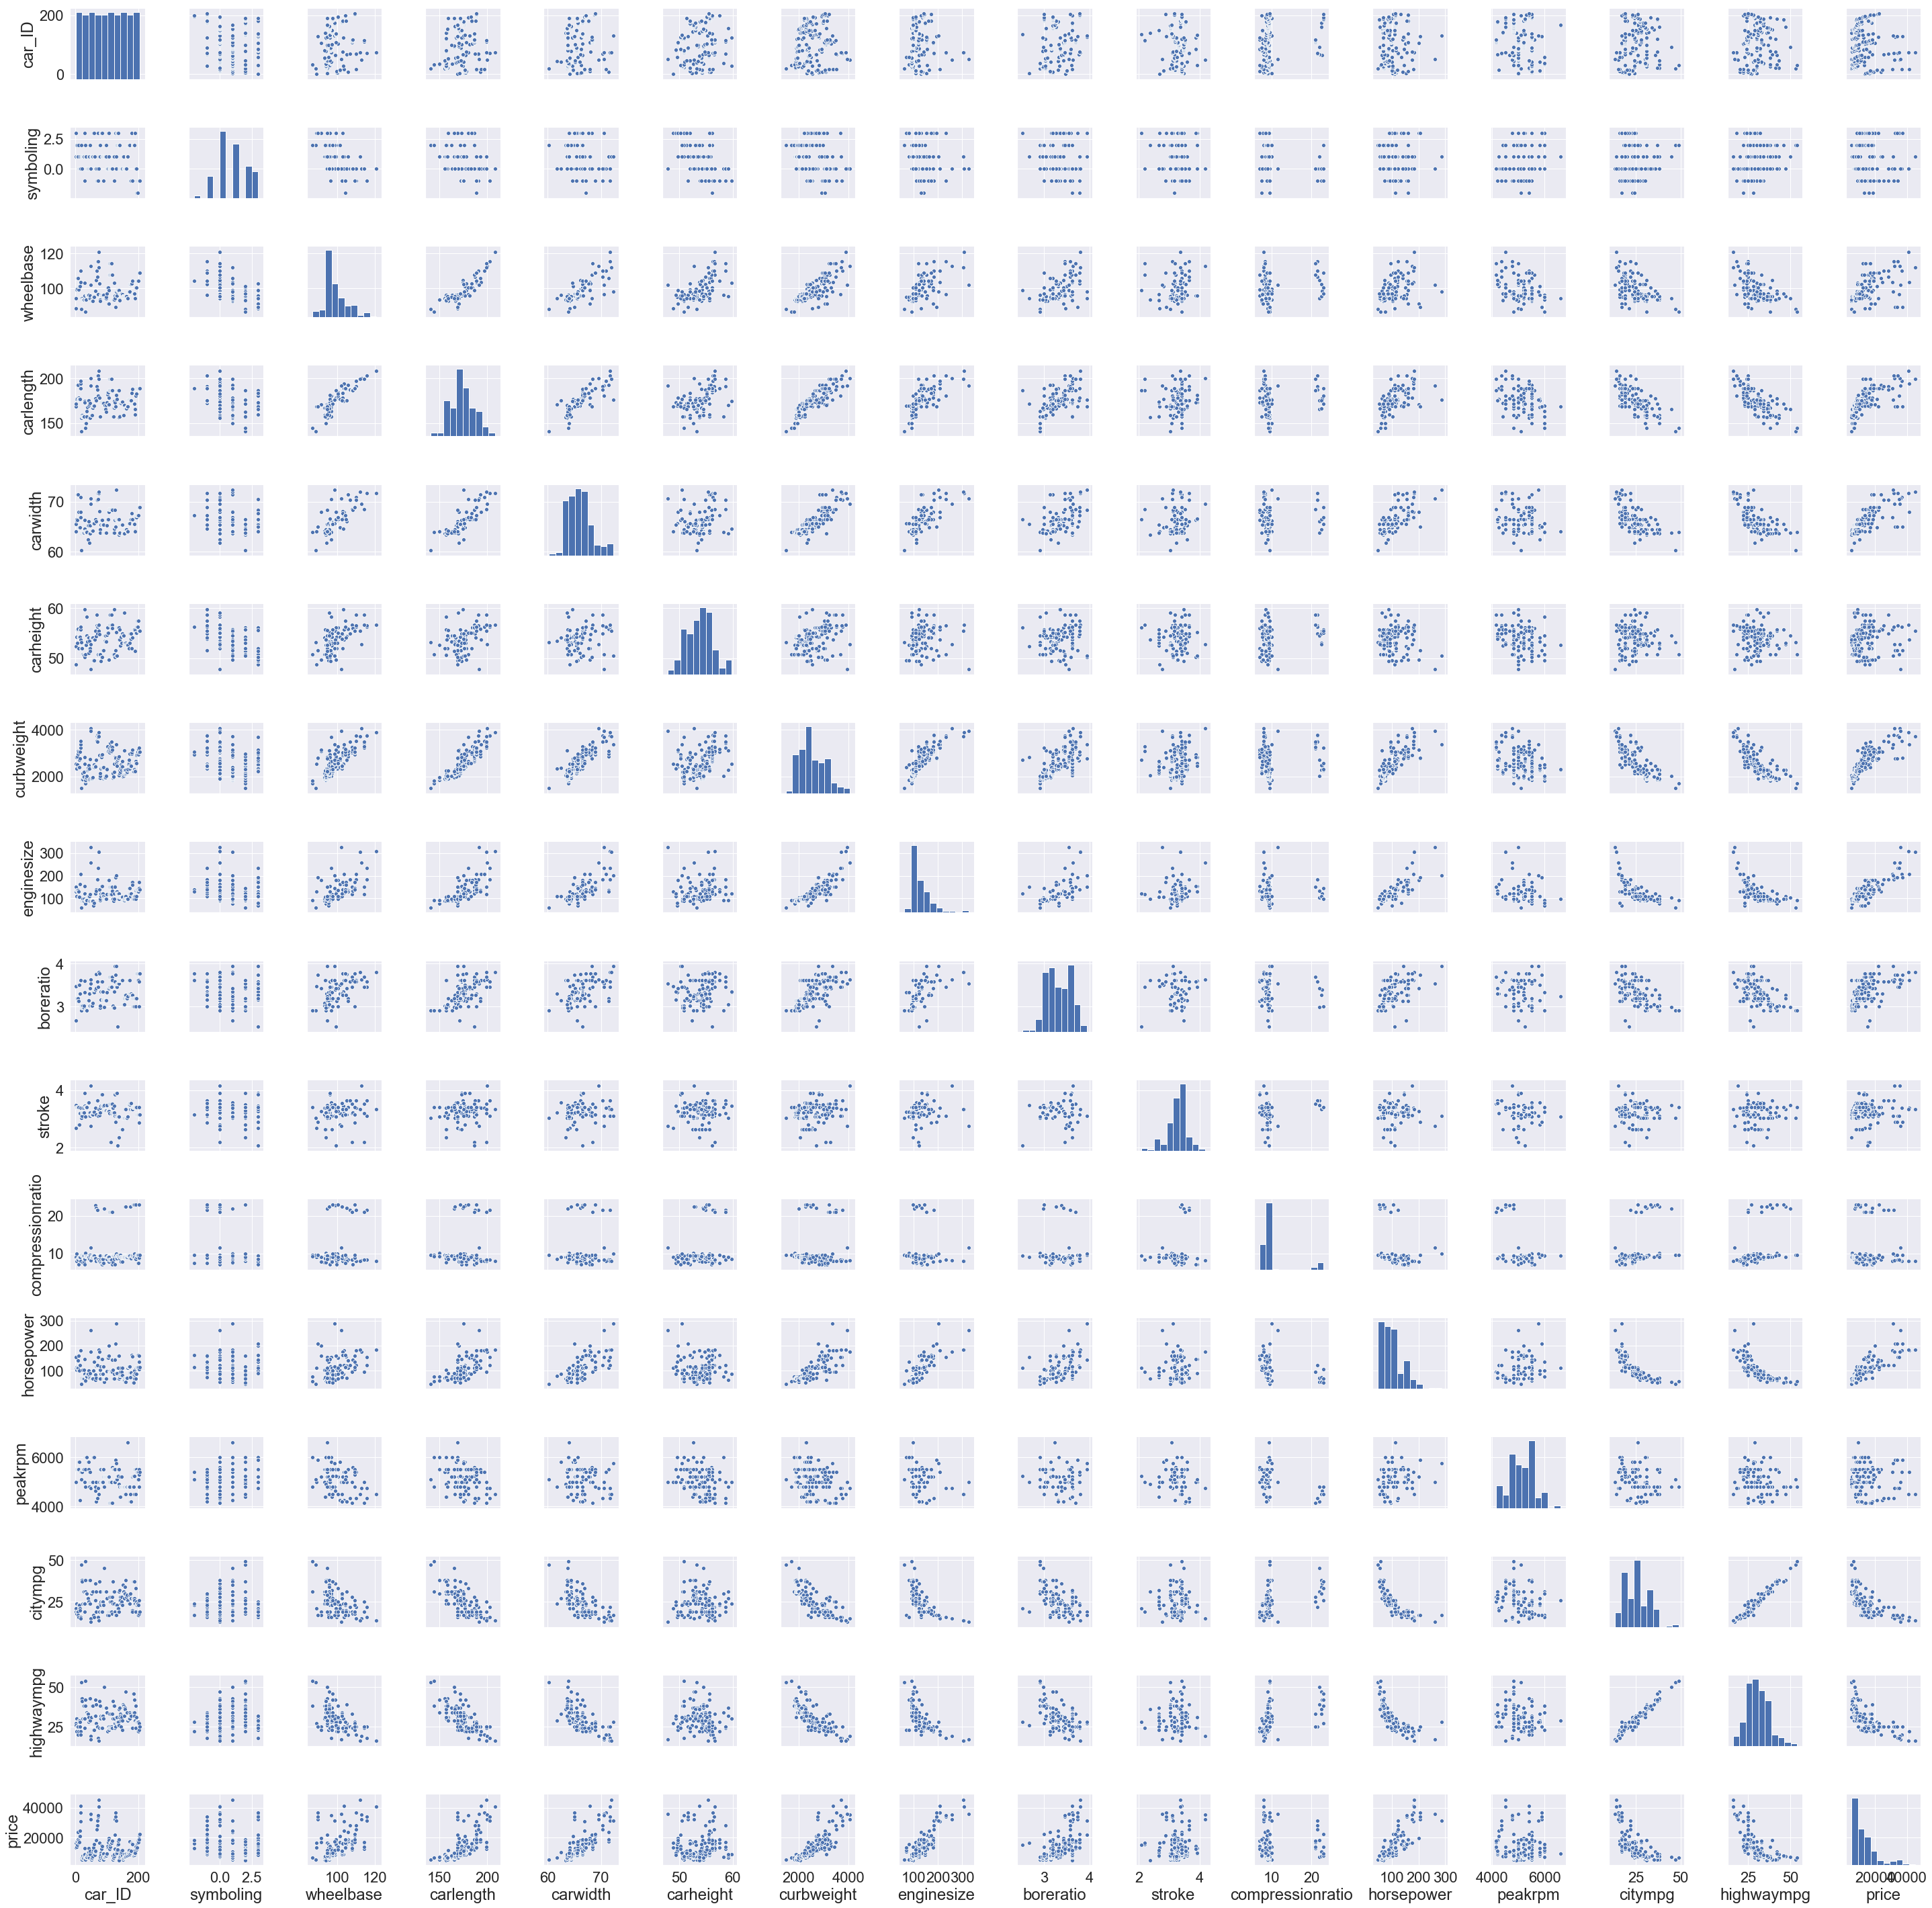

In [99]:
sns.set(font_scale=2)
sns.pairplot(car_df)

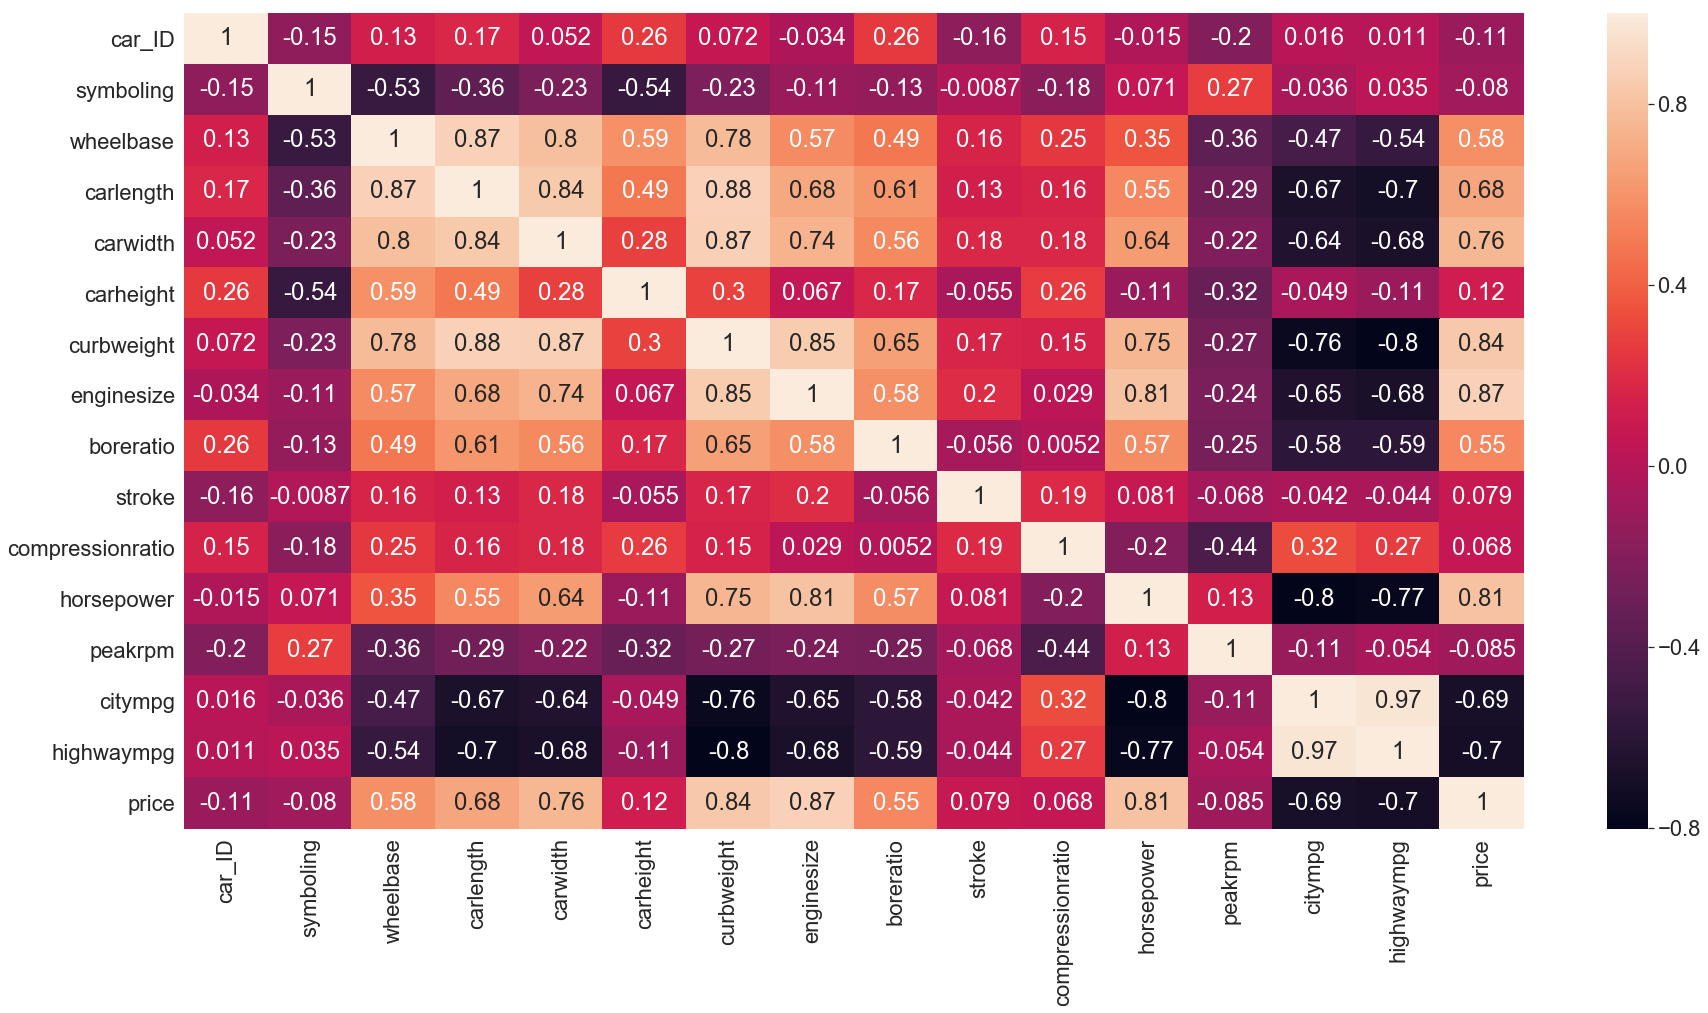

In [100]:
plt.figure(figsize = (30,15))  
sns.heatmap(car_df.corr(),annot = True)

# Data Preparation

#### Dealing with highly corelatted values.

1. From above heatmap and scatter plot it is clear that thier is high corelation between wheelbase, carlength, crubweight,carwidth. So we will keep only one among all this four.Keeping carlength in car_df and dropping remaining.

2. High corelation between citympg and highwaympg, so droping highwaympg.

3. Also we can see that there is high corelation between horsepower and enginesize.


In [101]:
# Droping carwidth,curbweight,wheelbase,highwaympg
car_df.drop(['carwidth','curbweight','wheelbase','highwaympg','enginesize'], axis =1, inplace = True)

#### Dealing with unique values.

1. For our analysis we don't required Car_ID, so droping it.

In [102]:
# Droping Car_ID
car_df.drop(['car_ID'], axis =1, inplace = True)

In [103]:
# Splitting carname into 'car company' and the second is the 'car model'. 

new = car_df["CarName"].str.split(" ",n = 1, expand = True)
car_df["Car_Comp"] = new[0]

# Droping CarName

car_df.drop(['CarName'], axis =1, inplace = True)
car_df.head()


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,Car_Comp
0,3,gas,std,two,convertible,rwd,front,168.8,48.8,dohc,four,mpfi,3.47,2.68,9.0,111,5000,21,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,168.8,48.8,dohc,four,mpfi,3.47,2.68,9.0,111,5000,21,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,171.2,52.4,ohcv,six,mpfi,2.68,3.47,9.0,154,5000,19,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,176.6,54.3,ohc,four,mpfi,3.19,3.40,10.0,102,5500,24,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,176.6,54.3,ohc,five,mpfi,3.19,3.40,8.0,115,5500,18,17450.0,audi


In [104]:
# Checking unique values in Car_Comp for data 
car_df['Car_Comp'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [105]:
### Replacing all below 
#'maxda', 'mazda'
#'Nissan', 'nissan'
#'porsche','porcshce'
#'toyota', 'toyouta',
#'vokswagen', 'volkswagen', 'vw',
###
car_df['Car_Comp'] = car_df['Car_Comp'].str.replace('vw','volkswagen')
car_df['Car_Comp'] = car_df['Car_Comp'].str.replace('vokswagen','volkswagen')
car_df['Car_Comp'] = car_df['Car_Comp'].str.replace('toyouta','toyota')
car_df['Car_Comp'] = car_df['Car_Comp'].str.replace('porcshce','porsche')
car_df['Car_Comp'] = car_df['Car_Comp'].str.replace('maxda','mazda')
car_df['Car_Comp'] = car_df['Car_Comp'].str.replace('maxda','mazda')

In [136]:
car_df1 = pd.get_dummies(car_df, drop_first = True)
car_df1.head()

,symboling,carlength,carheight,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,...,Car_Comp_nissan,Car_Comp_peugeot,Car_Comp_plymouth,Car_Comp_porsche,Car_Comp_renault,Car_Comp_saab,Car_Comp_subaru,Car_Comp_toyota,Car_Comp_volkswagen,Car_Comp_volvo
0,3,168.8,48.8,3.47,2.68,9.0,111,5000,21,13495.0,...,0,0,0,0,0,0,0,0,0,0
1,3,168.8,48.8,3.47,2.68,9.0,111,5000,21,16500.0,...,0,0,0,0,0,0,0,0,0,0
2,1,171.2,52.4,2.68,3.47,9.0,154,5000,19,16500.0,...,0,0,0,0,0,0,0,0,0,0
3,2,176.6,54.3,3.19,3.40,10.0,102,5500,24,13950.0,...,0,0,0,0,0,0,0,0,0,0
4,2,176.6,54.3,3.19,3.40,8.0,115,5500,18,17450.0,...,0,0,0,0,0,0,0,0,0,0


### Rescaling the Features

In [137]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['symboling','carlength','carheight','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','price']
car_df1[num_vars] = scaler.fit_transform(car_df1[num_vars])
car_df1.describe()

C:\Users\narottam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,symboling,carlength,carheight,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,...,Car_Comp_nissan,Car_Comp_peugeot,Car_Comp_plymouth,Car_Comp_porsche,Car_Comp_renault,Car_Comp_saab,Car_Comp_subaru,Car_Comp_toyota,Car_Comp_volkswagen,Car_Comp_volvo
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.566829,0.491780,0.493740,0.564111,0.564483,0.196409,0.233821,0.398009,0.339431,0.202540,...,0.082927,0.053659,0.034146,0.024390,0.009756,0.029268,0.058537,0.156098,0.058537,0.053659
std,0.249061,0.184139,0.203627,0.193460,0.149332,0.248253,0.164767,0.194688,0.181726,0.198323,...,0.276447,0.225894,0.182050,0.154635,0.098531,0.168970,0.235330,0.363836,0.235330,0.225894
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.376119,0.350000,0.435714,0.495238,0.100000,0.091667,0.265306,0.166667,0.066283,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.479104,0.525000,0.550000,0.580952,0.125000,0.195833,0.428571,0.305556,0.128519,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.800000,0.626866,0.641667,0.742857,0.638095,0.150000,0.283333,0.551020,0.472222,0.282632,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Splitting the Data into Training and Testing Sets

In [138]:
refinedcol = car_df1.columns
refinedcol

Index(['symboling', 'carlength', 'carheight', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'Car_Comp_alfa-romero',
       'Car_Comp_audi', 'Car_Comp_bmw', 'Car_Comp_buick', 'Car_Comp_chevrolet',
       'Car_Comp_dodge', 'Car_Comp_honda', 'Car_Comp_isuzu', 'Car_Comp_jaguar',
       'Car_Comp_mazda', 'Car_Comp_mercury'

In [139]:
X = car_df1[['symboling', 'carlength', 'carheight', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'Car_Comp_alfa-romero',
       'Car_Comp_audi', 'Car_Comp_bmw', 'Car_Comp_buick', 'Car_Comp_chevrolet',
       'Car_Comp_dodge', 'Car_Comp_honda', 'Car_Comp_isuzu', 'Car_Comp_jaguar',
       'Car_Comp_mazda', 'Car_Comp_mercury', 'Car_Comp_mitsubishi',
       'Car_Comp_nissan', 'Car_Comp_peugeot', 'Car_Comp_plymouth',
       'Car_Comp_porsche', 'Car_Comp_renault', 'Car_Comp_saab',
       'Car_Comp_subaru', 'Car_Comp_toyota', 'Car_Comp_volkswagen',
       'Car_Comp_volvo']]
y = car_df1['price']

In [140]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively

#np.random.seed(0)

#car_df_train, car_df_test = train_test_split(car_df1, train_size = 0.7, test_size = 0.3, random_state = 100)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

### Recursive Feature Elimination

In [141]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[False  True False False False False  True False False  True False False
 False False False False False False  True  True False False False False
 False  True  True  True  True  True  True False False False False False
 False False False False  True  True False False False False  True False
 False False False False False  True False False False False False False]
[40  1 25 19 29 36  1 16  8  1 20 39  5  2  4  3 38 37  1  1 28 11 12 23
 14  1  1  1  1  1  1 44 24 15 41 27 13 43 10  7  1  1 45 35 31 17  1 21
 42 46 33  9 34  1 30 18 32 22 26  6]


In [142]:
X_train.columns[rfe.support_]

Index(['carlength', 'horsepower', 'fueltype_gas', 'enginelocation_rear',
       'enginetype_dohcv', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'Car_Comp_bmw', 'Car_Comp_buick',
       'Car_Comp_jaguar', 'Car_Comp_porsche'],
      dtype='object')

In [143]:
#variables that are to be dropped
X_train.columns
col = X_train.columns[~rfe.support_]
col

Index(['symboling', 'carheight', 'boreratio', 'stroke', 'compressionratio',
       'peakrpm', 'citympg', 'aspiration_turbo', 'doornumber_two',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'Car_Comp_alfa-romero',
       'Car_Comp_audi', 'Car_Comp_chevrolet', 'Car_Comp_dodge',
       'Car_Comp_honda', 'Car_Comp_isuzu', 'Car_Comp_mazda',
       'Car_Comp_mercury', 'Car_Comp_mitsubishi', 'Car_Comp_nissan',
       'Car_Comp_peugeot', 'Car_Comp_plymouth', 'Car_Comp_renault',
       'Car_Comp_saab', 'Car_Comp_subaru', 'Car_Comp_toyota',
       'Car_Comp_volkswagen', 'Car_Comp_volvo'],
      dtype='object')

In [144]:
print("Before droping of columns")
X_train.columns
X_train1 = X_train.drop(col,1)
print("After Droping of columns")
X_train1.columns


Before droping of columns
After Droping of columns


Index(['carlength', 'horsepower', 'fueltype_gas', 'enginelocation_rear',
       'enginetype_dohcv', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'Car_Comp_bmw', 'Car_Comp_buick',
       'Car_Comp_jaguar', 'Car_Comp_porsche'],
      dtype='object')

In [145]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train1 = sm.add_constant(X_train1)

In [146]:
lm_1 = sm.OLS(y_train,X_train1).fit() # Running the linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     107.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.90e-64
Time:                        18:26:20   Log-Likelihood:                 219.21
No. Observations:                 143   AIC:                            -406.4
Df Residuals:                     127   BIC:                            -359.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.30

In [147]:
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [148]:
car_df1.drop(col, axis =1, inplace = True)
car_df1.head()

,carlength,horsepower,price,fueltype_gas,enginelocation_rear,enginetype_dohcv,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,Car_Comp_bmw,Car_Comp_buick,Car_Comp_jaguar,Car_Comp_porsche
0,0.413433,0.262500,0.207959,1,0,0,0,1,0,0,0,0,0,0,0,0
1,0.413433,0.262500,0.282558,1,0,0,0,1,0,0,0,0,0,0,0,0
2,0.449254,0.441667,0.282558,1,0,0,0,0,1,0,0,0,0,0,0,0
3,0.529851,0.225000,0.219254,1,0,0,0,1,0,0,0,0,0,0,0,0
4,0.529851,0.279167,0.306142,1,0,0,1,0,0,0,0,0,0,0,0,0


In [149]:


# Calculating Vif value
# df.head()
vif_cal(input_data=car_df1, dependent_col="price")



,Var,Vif
0,carlength,16.80
6,cylindernumber_four,14.27
1,horsepower,13.39
2,fueltype_gas,11.41
14,Car_Comp_porsche,5.23
7,cylindernumber_six,4.31
3,enginelocation_rear,4.25
4,enginetype_dohcv,2.26
5,cylindernumber_five,1.87
9,cylindernumber_twelve,1.84


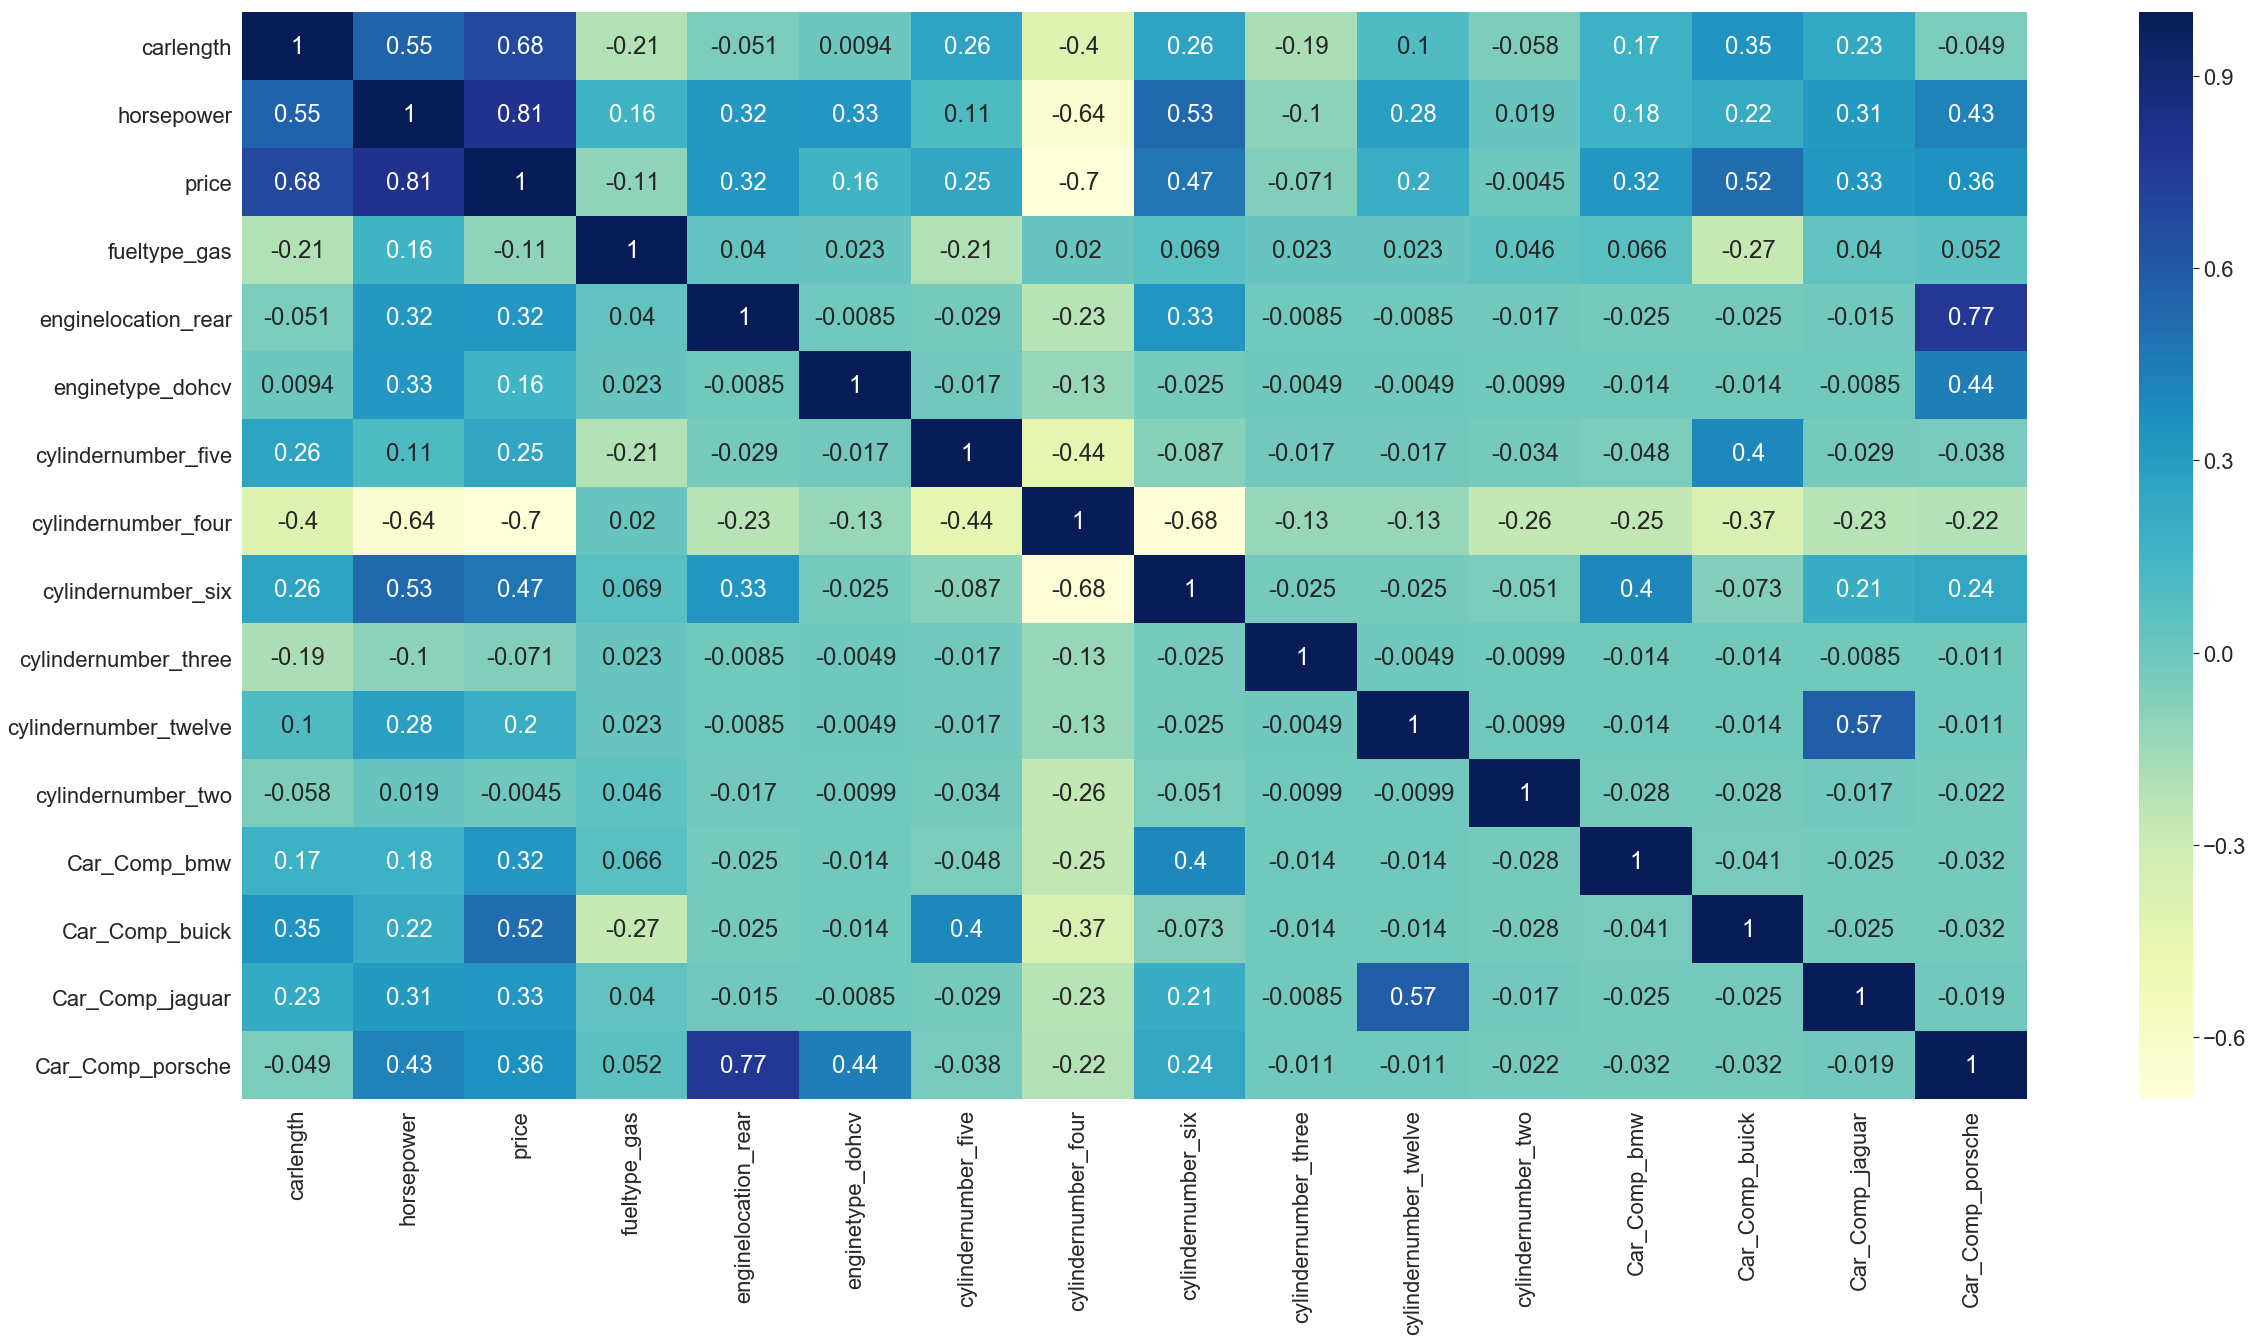

In [150]:
plt.figure(figsize = (40,20))  
sns.heatmap(car_df1.corr(),annot = True, cmap="YlGnBu")

In [151]:
X_train2 = X_train1.drop('horsepower', 1)

In [152]:
# Creating a second fitted model
lm_2 = sm.OLS(y_train,X_train2).fit()

In [153]:


#Let's see the summary of our second linear model
print(lm_2.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     71.14
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.64e-53
Time:                        18:26:29   Log-Likelihood:                 187.58
No. Observations:                 143   AIC:                            -345.2
Df Residuals:                     128   BIC:                            -300.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.32

In [154]:
car_df1.drop('horsepower', axis =1, inplace = True)
vif_cal(input_data=car_df1, dependent_col="price")

,Var,Vif
5,cylindernumber_four,12.72
0,carlength,10.43
1,fueltype_gas,8.95
13,Car_Comp_porsche,5.04
2,enginelocation_rear,4.24
6,cylindernumber_six,4.15
3,enginetype_dohcv,2.10
4,cylindernumber_five,1.84
12,Car_Comp_jaguar,1.75
11,Car_Comp_buick,1.70


In [155]:
X_train3 = X_train2.drop('enginetype_dohcv', 1)
# Creating a second fitted model
lm_3 = sm.OLS(y_train,X_train3).fit()

#Let's see the summary of our second linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     76.18
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           6.27e-54
Time:                        18:26:32   Log-Likelihood:                 186.73
No. Observations:                 143   AIC:                            -345.5
Df Residuals:                     129   BIC:                            -304.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

In [156]:
car_df1.drop('enginetype_dohcv', axis =1, inplace = True)
vif_cal(input_data=car_df1, dependent_col="price")

,Var,Vif
4,cylindernumber_four,12.13
0,carlength,10.17
1,fueltype_gas,8.80
5,cylindernumber_six,4.04
2,enginelocation_rear,2.83
12,Car_Comp_porsche,2.62
3,cylindernumber_five,1.82
11,Car_Comp_jaguar,1.75
10,Car_Comp_buick,1.69
7,cylindernumber_twelve,1.65


In [158]:
X_train4 = X_train3.drop('cylindernumber_twelve', 1)
# Creating a second fitted model
lm_4 = sm.OLS(y_train,X_train4).fit()

#Let's see the summary of our second linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     82.90
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           8.10e-55
Time:                        18:27:13   Log-Likelihood:                 186.52
No. Observations:                 143   AIC:                            -347.0
Df Residuals:                     130   BIC:                            -308.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2384 

In [159]:
car_df1.drop('cylindernumber_twelve', axis =1, inplace = True)
vif_cal(input_data=car_df1, dependent_col="price")

,Var,Vif
4,cylindernumber_four,11.60
0,carlength,9.94
1,fueltype_gas,8.62
5,cylindernumber_six,3.69
2,enginelocation_rear,2.81
11,Car_Comp_porsche,2.62
3,cylindernumber_five,1.79
9,Car_Comp_buick,1.67
8,Car_Comp_bmw,1.32
7,cylindernumber_two,1.28


In [160]:
X_train5 = X_train4.drop('cylindernumber_four', 1)
# Creating a second fitted model
lm_5 = sm.OLS(y_train,X_train5).fit()

#Let's see the summary of our second linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     72.12
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.59e-50
Time:                        18:28:20   Log-Likelihood:                 171.94
No. Observations:                 143   AIC:                            -319.9
Df Residuals:                     131   BIC:                            -284.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0687 

In [161]:
car_df1.drop('cylindernumber_four', axis =1, inplace = True)
vif_cal(input_data=car_df1, dependent_col="price")

,Var,Vif
0,carlength,5.97
1,fueltype_gas,4.91
2,enginelocation_rear,2.73
10,Car_Comp_porsche,2.53
4,cylindernumber_six,1.78
8,Car_Comp_buick,1.41
3,cylindernumber_five,1.32
7,Car_Comp_bmw,1.31
9,Car_Comp_jaguar,1.12
5,cylindernumber_three,1.03


In [162]:
X_train6 = X_train5.drop('fueltype_gas', 1)
# Creating a second fitted model
lm_6 = sm.OLS(y_train,X_train6).fit()

#Let's see the summary of our second linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     79.89
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           5.15e-51
Time:                        18:30:24   Log-Likelihood:                 171.90
No. Observations:                 143   AIC:                            -321.8
Df Residuals:                     132   BIC:                            -289.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0754 

In [163]:
car_df1.drop('fueltype_gas', axis =1, inplace = True)
vif_cal(input_data=car_df1, dependent_col="price")

,Var,Vif
1,enginelocation_rear,2.73
9,Car_Comp_porsche,2.53
3,cylindernumber_six,1.77
0,carlength,1.50
6,Car_Comp_bmw,1.31
2,cylindernumber_five,1.29
7,Car_Comp_buick,1.29
8,Car_Comp_jaguar,1.11
5,cylindernumber_two,1.02
4,cylindernumber_three,1.00


In [164]:
X_train7 = X_train6.drop('enginelocation_rear', 1)
# Creating a second fitted model
lm_7 = sm.OLS(y_train,X_train7).fit()

#Let's see the summary of our second linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     88.55
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           9.30e-52
Time:                        18:31:49   Log-Likelihood:                 171.29
No. Observations:                 143   AIC:                            -322.6
Df Residuals:                     133   BIC:                            -292.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0740 

In [165]:
car_df1.drop('enginelocation_rear', axis =1, inplace = True)
vif_cal(input_data=car_df1, dependent_col="price")

,Var,Vif
2,cylindernumber_six,1.62
0,carlength,1.49
1,cylindernumber_five,1.29
5,Car_Comp_bmw,1.29
6,Car_Comp_buick,1.29
8,Car_Comp_porsche,1.11
7,Car_Comp_jaguar,1.10
4,cylindernumber_two,1.02
3,cylindernumber_three,1.00


In [166]:
X_train8 = X_train7.drop('cylindernumber_six', 1)
# Creating a second fitted model
lm_8 = sm.OLS(y_train,X_train8).fit()

#Let's see the summary of our second linear model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     83.48
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.80e-48
Time:                        18:32:55   Log-Likelihood:                 160.16
No. Observations:                 143   AIC:                            -302.3
Df Residuals:                     134   BIC:                            -275.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0916 

In [167]:
car_df1.drop('cylindernumber_six', axis =1, inplace = True)
vif_cal(input_data=car_df1, dependent_col="price")

,Var,Vif
0,carlength,1.34
1,cylindernumber_five,1.28
5,Car_Comp_buick,1.28
4,Car_Comp_bmw,1.08
6,Car_Comp_jaguar,1.05
3,cylindernumber_two,1.02
7,Car_Comp_porsche,1.02
2,cylindernumber_three,1.00


In [169]:
X_train9 = X_train8.drop('cylindernumber_two', 1)
# Creating a second fitted model
lm_9 = sm.OLS(y_train,X_train9).fit()

#Let's see the summary of our second linear model
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     93.02
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.70e-48
Time:                        18:38:39   Log-Likelihood:                 158.21
No. Observations:                 143   AIC:                            -300.4
Df Residuals:                     135   BIC:                            -276.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0876 

In [170]:
car_df1.drop('cylindernumber_two', axis =1, inplace = True)
vif_cal(input_data=car_df1, dependent_col="price")

,Var,Vif
0,carlength,1.32
1,cylindernumber_five,1.28
4,Car_Comp_buick,1.28
3,Car_Comp_bmw,1.08
5,Car_Comp_jaguar,1.05
6,Car_Comp_porsche,1.02
2,cylindernumber_three,1.00


In [172]:
X_train10 = X_train9.drop('cylindernumber_three', 1)
# Creating a second fitted model
lm_10 = sm.OLS(y_train,X_train10).fit()

#Let's see the summary of our second linear model
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     108.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.66e-49
Time:                        18:39:49   Log-Likelihood:                 157.64
No. Observations:                 143   AIC:                            -301.3
Df Residuals:                     136   BIC:                            -280.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0821    

In [173]:
car_df1.drop('cylindernumber_three', axis =1, inplace = True)
vif_cal(input_data=car_df1, dependent_col="price")

,Var,Vif
0,carlength,1.32
1,cylindernumber_five,1.28
3,Car_Comp_buick,1.28
2,Car_Comp_bmw,1.08
4,Car_Comp_jaguar,1.05
5,Car_Comp_porsche,1.02


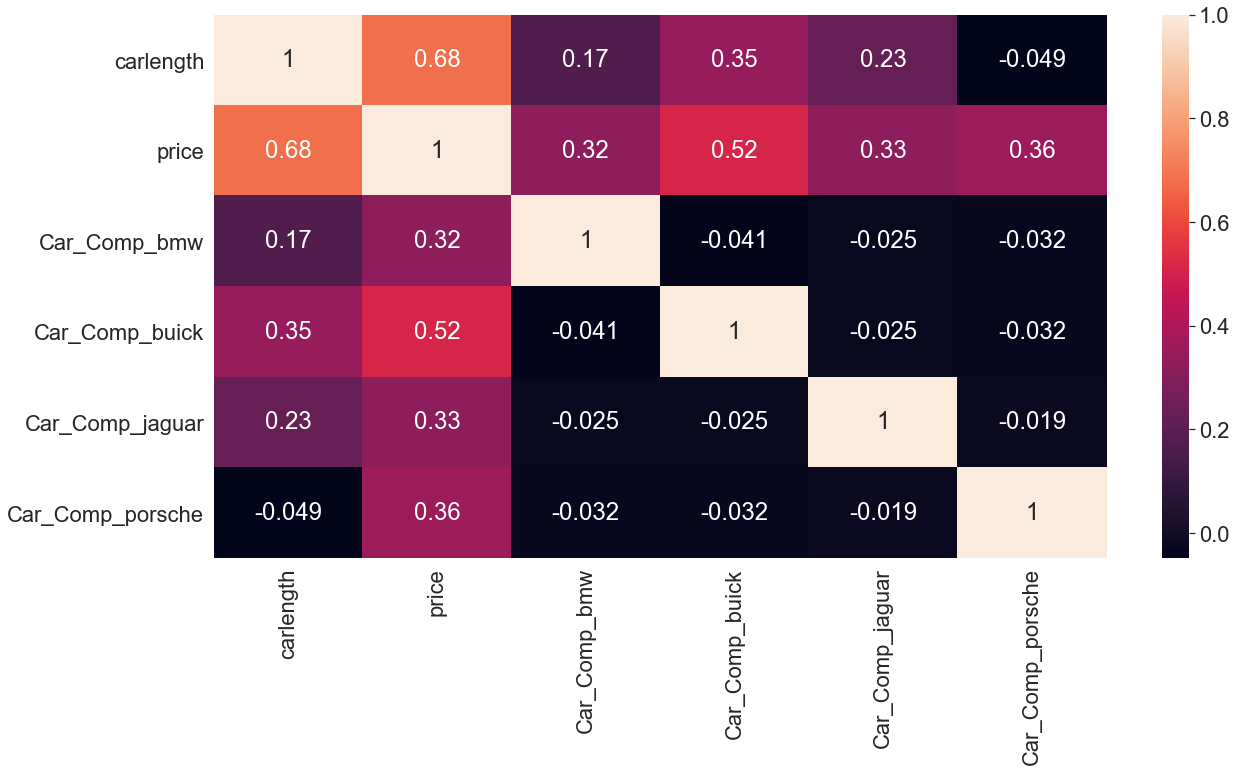

In [187]:
plt.figure(figsize = (20,10))  
sns.heatmap(car_df1.corr(),annot = True)

In [185]:
X_train11 = X_train10.drop('cylindernumber_five', 1)
# Creating a second fitted model
lm_11 = sm.OLS(y_train,X_train11).fit()

#Let's see the summary of our second linear model
print(lm_11.summary())
  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     128.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           5.56e-50
Time:                        18:51:28   Log-Likelihood:                 156.67
No. Observations:                 143   AIC:                            -301.3
Df Residuals:                     137   BIC:                            -283.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0855      0.020  

In [186]:
car_df1.drop('cylindernumber_five', axis =1, inplace = True)
vif_cal(input_data=car_df1, dependent_col="price")

,Var,Vif
0,carlength,1.26
2,Car_Comp_buick,1.12
1,Car_Comp_bmw,1.07
3,Car_Comp_jaguar,1.05
4,Car_Comp_porsche,1.02


### Prediction with model-10

In [190]:
# Adding  constant variable to test dataframe
X_test_m11 = sm.add_constant(X_test)

In [191]:
# Creating X_test_m9 dataframe by dropping variables from X_test_m9
X_test_m11 = X_test_m11.drop(col, axis=1)
X_test_m11 = X_test_m11.drop(['cylindernumber_five','horsepower', 'enginetype_dohcv','cylindernumber_twelve','cylindernumber_four','fueltype_gas','enginelocation_rear','cylindernumber_six','cylindernumber_two','cylindernumber_three'], axis=1)
X_test_m11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 6 columns):
const               62 non-null float64
carlength           62 non-null float64
Car_Comp_bmw        62 non-null uint8
Car_Comp_buick      62 non-null uint8
Car_Comp_jaguar     62 non-null uint8
Car_Comp_porsche    62 non-null uint8
dtypes: float64(2), uint8(4)
memory usage: 1.7 KB


In [192]:
# Making predictions
y_pred_m11 = lm_11.predict(X_test_m11)
y_pred_m11

160    0.101774
186    0.141912
59     0.187252
165    0.119613
140    0.034879
64     0.187252
198    0.269013
75     0.191712
172    0.175360
104    0.134479
200    0.269013
136    0.252661
111    0.253404
41     0.169413
73     0.749549
31    -0.059518
156    0.101774
133    0.252661
65     0.166440
83     0.153061
195    0.269013
197    0.269013
126    0.579717
118    0.034879
167    0.175360
101    0.216240
124    0.153061
69     0.596433
11     0.478982
46     0.148601
         ...   
110    0.344085
201    0.269013
115    0.253404
174    0.170900
134    0.252661
169    0.175360
92     0.094342
173    0.170900
74     0.683397
3      0.178333
157    0.101774
81     0.151574
32    -0.019381
99     0.154548
26     0.034879
88     0.147115
184    0.141912
187    0.141912
52     0.048258
168    0.175360
164    0.119613
188    0.141912
7      0.298001
158    0.101774
123    0.163467
28     0.163467
29     0.153061
182    0.141912
40     0.169413
128    0.579717
Length: 62, dtype: float

Text(0, 0.5, 'Car Price')

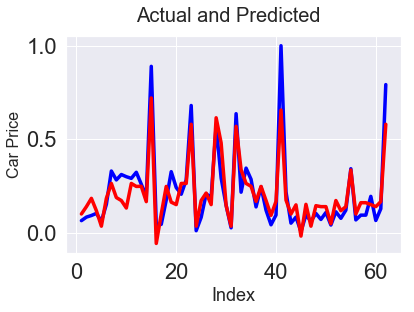

In [193]:


# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_m9, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)  



Text(0, 0.5, 'y_pred')

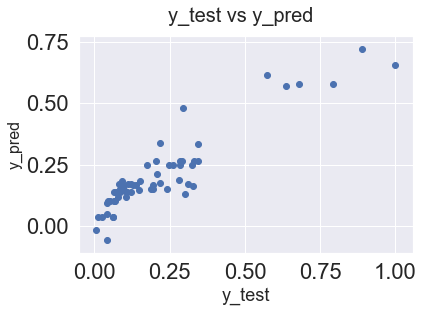

In [194]:
#Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m9)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

Text(0, 0.5, 'ytest-ypred')

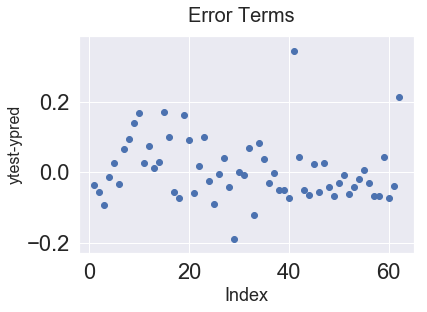

In [195]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,63,1)]
# plt.plot(c,y_test-y_pred_m9, color="blue", linewidth=2.5, linestyle="-")
plt.scatter(c,y_test-y_pred_m9)

fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Text(0, 0.5, 'Index')

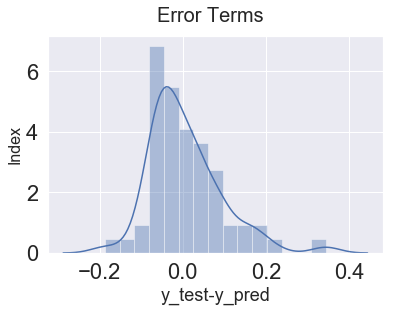

In [197]:


# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_m9),bins=15)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)             



In [200]:
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred_m11)))

RMSE : 0.08502649051356047


In [201]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m11)

0.8324856428485238

## Conclusion

1.  R-squared (0.825) and Adj. R-squared(0.818) are very near to each other.

2. As we can see that the model seems to be stable, The variables that can affect price are:
        carlength
        Car_Comp_bmw
        Car_Comp_buick
        Car_Comp_jaguar
        Car_Comp_porsche
    